Israel Beyene

# Supervised learning in python using scikit-learn on the dataset Crabs of MASS packages of R

Supervised learning is one type of machine learning. Here the training set of data contains a label.The goal of this learning is to predict the label (target or class) of a new data (test set).
eg. to predict someone sickness given different features (laboratory result, symptom etc.)
Bayes classifier, Logistic Regression, Deep Learning, Support Vector Machines are some of the most commonly used algorithm in supervised learning.

For this project the dataset of crabs of  MASS package of R was used. It is a data of rock crabs of the genus Leptograpsus. One species, L. variegatus, had been split into two new species according to their colour orange (O) and blue (B). Preserved specimens lose their colour, so it was hoped that morphological differences would enable museum material to be classified.
Data are available on 50 specimens of each sex of each species. Each specimen has measurements on:
the width of the frontal lobe FL,
the rear width RW,
the length along the carapace midline CL,
the maximum width CW of the carapace,
and the body depth BD in mm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
plt.style.use('ggplot')

Load up the crabs dataset into a dataframe.

In [3]:
df=pd.read_csv('crabs.data', sep=',' )

To check the data structure of this data frame

In [4]:
print(df.head())
print(df.shape)
print(df.groupby('sp').size())
print(df.groupby('sex').size())

   id sp sex  index   FL   RW    CL    CW   BD
0   1  B   M      1  8.1  6.7  16.1  19.0  7.0
1   2  B   M      2  8.8  7.7  18.1  20.8  7.4
2   3  B   M      3  9.2  7.8  19.0  22.4  7.7
3   4  B   M      4  9.6  7.9  20.1  23.1  8.2
4   5  B   M      5  9.8  8.0  20.3  23.0  8.2
(200, 9)
sp
B    100
O    100
dtype: int64
sex
F    100
M    100
dtype: int64


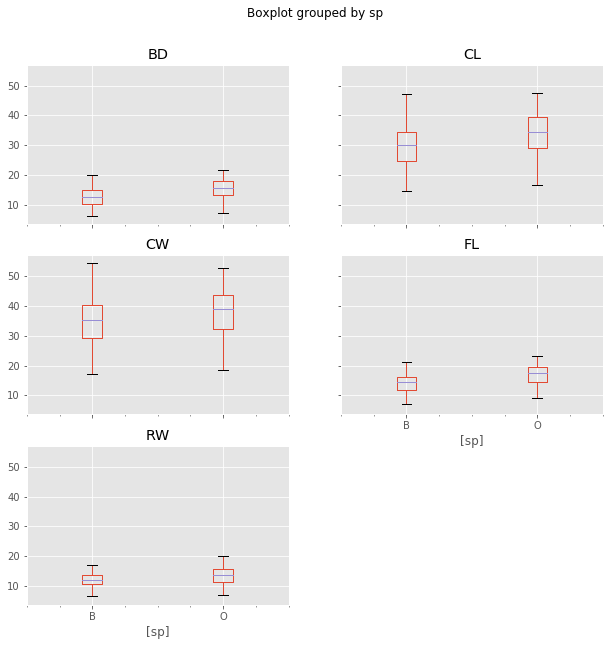

In [5]:
# excluding id and index
df.iloc[:,[1,2,4,5,6,7,8]].boxplot(by="sp", figsize=(10, 10))
plt.show()

#The Goal of this project is to predict the species of craps (B  or O) and their sex (M or F)

To predict the species type and their sex the data was modified using the code below

In [6]:
#First id and index columnns were removed
df.drop(['id', "index"],axis = 1, inplace = True)
print(df.head(3))

  sp sex   FL   RW    CL    CW   BD
0  B   M  8.1  6.7  16.1  19.0  7.0
1  B   M  8.8  7.7  18.1  20.8  7.4
2  B   M  9.2  7.8  19.0  22.4  7.7


In [7]:
df.loc[:,'sp_sex'] = df[['sp', 'sex']].apply(lambda x: ''"_" .join(x), axis=1)
# to add a new column with the information the type of species and its sex.
#Here we have 4 labels

In [8]:
print(df.head(3))
print(df.sp_sex.unique())
print(df.groupby("sp_sex").size())

  sp sex   FL   RW    CL    CW   BD sp_sex
0  B   M  8.1  6.7  16.1  19.0  7.0    B_M
1  B   M  8.8  7.7  18.1  20.8  7.4    B_M
2  B   M  9.2  7.8  19.0  22.4  7.7    B_M
['B_M' 'B_F' 'O_M' 'O_F']
sp_sex
B_F    50
B_M    50
O_F    50
O_M    50
dtype: int64


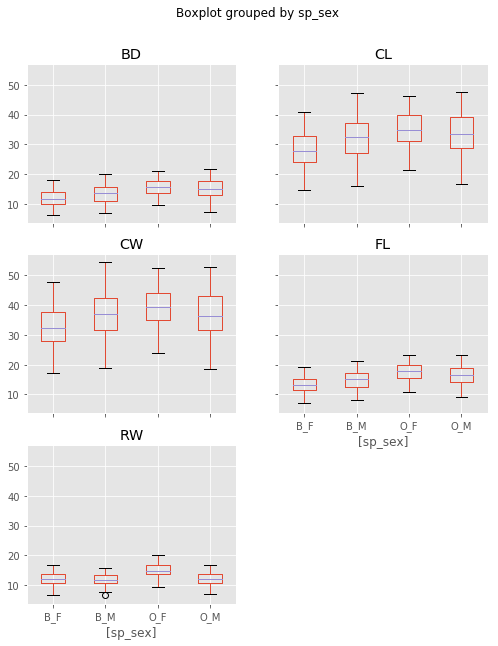

In [9]:
df.iloc[:,[2,3,4,5,6,7]].boxplot(by="sp_sex", figsize=(8, 10))
plt.show()

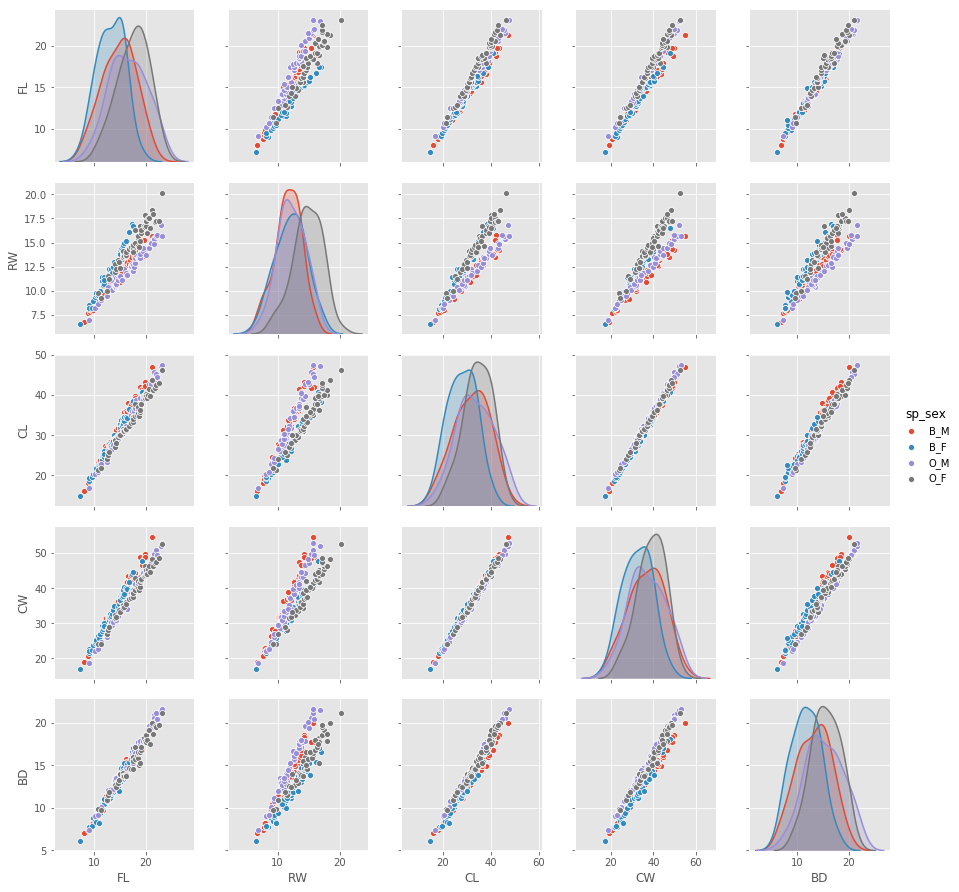

In [10]:
import seaborn as sns
sns.pairplot(df, hue="sp_sex")
plt.show()

Given the plots shown above it is difficult to predict the name of the species and its sex. Therefore different supervised learning algorithms were compared in order to predict the target of a test data set. 

Before performing these different algorithms the data frame was processed.
sp and sex columns were removed. Additionally the data frame was splitted into two, features and label.

In [11]:
y = df.sp_sex #label

In [12]:
y.unique()

array(['B_M', 'B_F', 'O_M', 'O_F'], dtype=object)

In [13]:
df.drop(["sp","sex","sp_sex"],axis = 1, inplace = True)
#cleaning the data frame
print(df.head(3))

    FL   RW    CL    CW   BD
0  8.1  6.7  16.1  19.0  7.0
1  8.8  7.7  18.1  20.8  7.4
2  9.2  7.8  19.0  22.4  7.7


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
FL    200 non-null float64
RW    200 non-null float64
CL    200 non-null float64
CW    200 non-null float64
BD    200 non-null float64
dtypes: float64(5)
memory usage: 7.9 KB


In [15]:
print(df[pd.isnull(df).any(axis=1)])#it is also important to check any null data

Empty DataFrame
Columns: [FL, RW, CL, CW, BD]
Index: []


In [16]:
y = y.map({'B_M': 0, 'B_F': 1, 'O_M': 2,"O_F":3})#encoding the labels with numbers

In [17]:
y.unique()

array([0, 1, 2, 3], dtype=int64)

Split the data into  train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, stratify=y,test_size = 0.3,random_state=66)

In [19]:
print(y_test.size)
print(y_test.head(3))
print(X_test.head(3))

60
51    1
91    1
77    1
Name: sp_sex, dtype: int64
      FL    RW    CL    CW    BD
51   9.0   8.5  19.3  22.7   7.7
91  15.6  14.7  33.9  39.5  14.3
77  13.7  12.5  28.6  33.8  11.9


In [20]:
df.iloc[51,:]

FL     9.0
RW     8.5
CL    19.3
CW    22.7
BD     7.7
Name: 51, dtype: float64

# # K-Nearest Neighbors Classifier

Given a new measurement of a crabs, the task of the classifier is to figure out to which of the four
label it belongs. KNN is thesimplest possible classifier. The algorithm searches within the features in
the training set that most closely resembles the test sample.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of knn classifier on \
training set using default n_neighbors is: {:.2f}%'.format
      (knn.score(X_train, y_train)*100))
print('Accuracy of knn classifier on \
test set using default n_neighbors is: {:.2f}%'.format
      (knn.score(X_test, y_test)*100))


Accuracy of knn classifier on training set using default n_neighbors is: 80.71%
Accuracy of knn classifier on test set using default n_neighbors is: 81.67%


let's search the K value which perform best

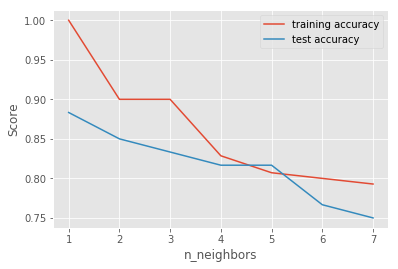

In [22]:
from sklearn.neighbors import KNeighborsClassifier
training_score = []
test_score = []
KNeighbors = range(1, 8)
for n_neighbors in KNeighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))
plt.plot(KNeighbors, training_score, label="training accuracy")
plt.plot(KNeighbors, test_score, label="test accuracy")
plt.ylabel("Score")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [23]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
print('Accuracy of knn classifier on \
training set using n_neighbors =1 is: {:.2f}%'.format
      (knn1.score(X_train, y_train)*100))
print('Accuracy of knn classifier on \
test set using n_neighbors =1 is: {:.2f}%'.format
      (knn1.score(X_test, y_test)*100))


Accuracy of knn classifier on training set using n_neighbors =1 is: 100.00%
Accuracy of knn classifier on test set using n_neighbors =1 is: 88.33%


 k value 1 improves the accuracy on both test and train set but it leads to overfitting (100%).


In [24]:
y_pred=knn.predict(X_test) #to predict the label of the new test data set

In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[13  2  0  0]
 [ 1 11  0  3]
 [ 0  3 11  1]
 [ 1  1  3 10]]
             precision    recall  f1-score   support

          0       0.87      0.87      0.87        15
          1       0.65      0.73      0.69        15
          2       0.79      0.73      0.76        15
          3       0.71      0.67      0.69        15

avg / total       0.75      0.75      0.75        60



Precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is the ability of the algorithm not to label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where fn is the number of false negatives. The recall is the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [26]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[13  2  0  0]
 [ 1 11  0  3]
 [ 0  3 11  1]
 [ 1  1  3 10]]
             precision    recall  f1-score   support

          0       0.87      0.87      0.87        15
          1       0.65      0.73      0.69        15
          2       0.79      0.73      0.76        15
          3       0.71      0.67      0.69        15

avg / total       0.75      0.75      0.75        60



The range of the feature variables of CL and CW ranges from 15 to 50 whereas the other ranges in between 5 and 25. For algorithm like  k-NN scalling the data is important.

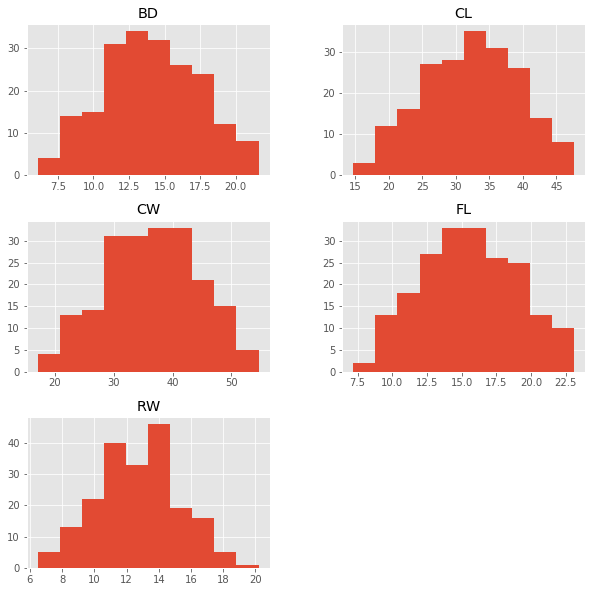

In [27]:
pd.DataFrame.hist(df,figsize = [10,10])
plt.show()

Scaling the datta using standard scaler, minmax scaler and normalizer

In [28]:
#StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minmaxS = scaler.fit_transform(X_train)
X_test_minmaxS = scaler.fit_transform(X_test)

In [30]:
#Normalizer()
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_NS = scaler.fit_transform(X_train)
X_test_NS = scaler.fit_transform(X_test)

In [31]:
knnN = KNeighborsClassifier()
knnN.fit(X_train_NS, y_train)
print('Accuracy of K-NN classifier on training set using default n_neighbors \
after normalized the data: {:.2f}%'.format(knnN.score(X_train_NS, y_train)*100))
print('Accuracy of K-NN classifier on test set using default n_neighbors \
after normalized the data: {:.2f}%'.format(knnN.score(X_test_NS, y_test)*100))

Accuracy of K-NN classifier on training set using default n_neighbors after normalized the data: 94.29%
Accuracy of K-NN classifier on test set using default n_neighbors after normalized the data: 91.67%


In [32]:
knnS = KNeighborsClassifier()
knnS.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set using default n_neighbors \
after standard scaler the ={:.2f}%'.format(knnS.score(X_train_scaled, y_train)*100))
print('Accuracy of K-NN classifier on test set using default n_neighbors \
after standard scaler the  data: {:.2f}%'.format(knnS.score(X_test_scaled, y_test)*100))

Accuracy of K-NN classifier on training set using default n_neighbors after standard scaler the =87.14%
Accuracy of K-NN classifier on test set using default n_neighbors after standard scaler the  data: 71.67%


In [33]:
knnM = KNeighborsClassifier()
knnM.fit(X_train_minmaxS, y_train)
print('Accuracy of K-NN classifier on training set using default n_neighbors \
after minmax scaler = {:.2f}%'.format(knnM.score(X_train_minmaxS, y_train)*100))
print('Accuracy of K-NN classifier on test set using default n_neighbors \
after minmax scaler = {:.2f}%'.format(knnM.score(X_test_minmaxS, y_test)*100))

Accuracy of K-NN classifier on training set using default n_neighbors after minmax scaler = 87.86%
Accuracy of K-NN classifier on test set using default n_neighbors after minmax scaler = 76.67%


Normalizing the data improved the accuracy of the knn algorithm from 81.67% (without scaling) to 91.67%.

# # Logistic regression

It is one of a classification algorithm.It predicts the probability of the dependent varable in our case P(label=0 or 1 or 2 or 3) as a function of features. It works well if the features are linearly related.

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Accuracy of logistic regression classifier on \
training set using default = {:.2f}%".format
      (logreg.score(X_train, y_train)*100))
print("Accuracy of logistic regression classifier on \
test set using default = {:.2f}%".format
      (logreg.score(X_test, y_test)*100))
score=logreg.score(X_test, y_test)

Accuracy of logistic regression classifier on training set using default = 95.71%
Accuracy of logistic regression classifier on test set using default = 95.00%


In [35]:
from sklearn.linear_model import LogisticRegression
logregN= LogisticRegression().fit(X_train_NS, y_train)
print("Accuracy of logistic regression classifier on \
training set after normalizing the data = {:.2f}%".format
      (logregN.score(X_train_NS, y_train)*100))
print("Accuracy of logistic regression classifier on \
test set after normalizing the data {:.2f}%".format(logregN.score(X_test_NS, y_test)*100))


Accuracy of logistic regression classifier on training set after normalizing the data = 92.86%
Accuracy of logistic regression classifier on test set after normalizing the data 90.00%


This algorithm performed better using original data than transformed.

In [36]:
y_pred=logreg.predict(X_test)

In [37]:
print(logreg.predict([[15.7,12.6,35.8,38.9,14.7]])) 
#to check with new data. Here the algorithm label the new data as B_m
#Blue male crabs

[0]


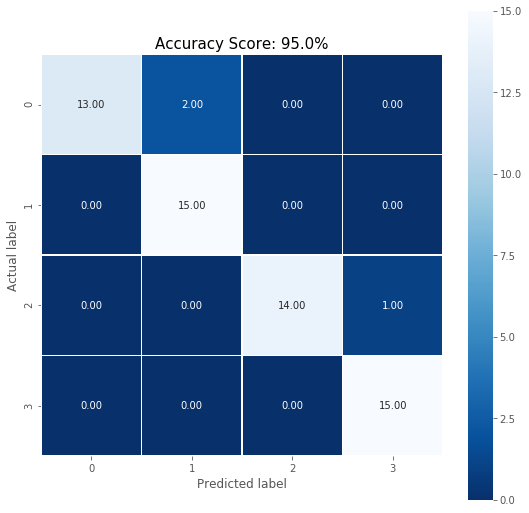

In [38]:
#another way of showing confusion matrix
from sklearn import metrics
plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y_test, logreg.predict(X_test)), annot=True, fmt=".2f", 
            linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}%'.format(score*100), size = 15)
plt.show()


Two times the algorithm misassigned label 0 as 1.
For this algorithm a default value of  C=1 (the trade-off parameter that determines the strength of the regularization) performed better.

# # Support Vector Classification

This algorithm discriminate new observations between different labels. It projects the observations in a multidimensional space called decisional space durring training phase and build a separation surface called decision boundary that divides this space into different areas of belonging. In the simplest case, that is, the linear case, the decision boundary will be represented by
a plane (in 3D) or by a straight line (in 2D). In more complex cases the separation surfaces are curved shapes with increasingly articulated shapes.

In [39]:
#support vector classification
from sklearn import svm
svc = svm.SVC(kernel='linear',C=1) #default gamma
svc.fit(X_train,y_train)
print("Accuracy of svc classifier on training set = {:.2f}%".format(svc.score(X_train, y_train)*100))
print("Accuracy of svc classifier on test set = {:.2f}%".format(svc.score(X_test, y_test)*100))

Accuracy of svc classifier on training set = 97.14%
Accuracy of svc classifier on test set = 95.00%


In [40]:
#support vector classification
from sklearn import svm
svcP = svm.SVC(kernel='poly',degree=3,C=1)
svcP.fit(X_train,y_train)
print("Accuracy of svc classifier on training set using polynomial kernel= {:.2f}%".format(
    svcP.score(X_train, y_train)*100))
print("Accuracy of svc classifier on test set using polynomial kernel = {:.2f}%".format(
    svcP.score(X_test, y_test)*100))

Accuracy of svc classifier on training set using polynomial kernel= 99.29%
Accuracy of svc classifier on test set using polynomial kernel = 96.67%


In [41]:
#support vector classification
from sklearn import svm
svcR = svm.SVC(kernel='rbf',C=1)
svcR.fit(X_train,y_train)
print("Training set score: {:.3f}%".format(svcR.score(X_train, y_train)*100))
print("Test set score: {:.3f}%".format(svcR.score(X_test, y_test)*100))

Training set score: 97.143%
Test set score: 85.000%


This algorithm performed very well using polynomial kernel on the original data and C value 1.

# #Decision Tree

It is a widely used model for classification and regression problems. They learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set using original data with \
a default values = {:.2f}%".format(tree.score(X_train, y_train)*100))
print("Accuracy on test set using original data with \
a default values = {:.2f}%".format(tree.score(X_test, y_test)*100))

Accuracy on training set using original data with a default values = 100.00%
Accuracy on test set using original data with a default values = 68.33%


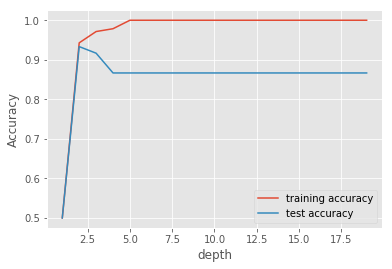

In [43]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
depth_settings= range(1, 20)
for max_depth in depth_settings:
    tree = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    tree.fit(X_train_NS, y_train)
    training_accuracy.append(tree.score(X_train_NS, y_train))
    test_accuracy.append(tree.score(X_test_NS, y_test))
plt.plot(depth_settings, training_accuracy, label="training accuracy")
plt.plot(depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("depth")
plt.legend()
plt.show()

In [44]:
tree = DecisionTreeClassifier(max_depth=2,random_state=0)
tree.fit(X_train_NS, y_train)
print("Accuracy on training set normalized and with a \
maximum depth 2 = {:.2f}%".format(tree.score(X_train_NS, y_train)*100))
print("Accuracy on test set normalized and with a \
maximum depth 2 = {:.2f}%".format(tree.score(X_test_NS, y_test)*100))

Accuracy on training set normalized and with a maximum depth 2 = 94.29%
Accuracy on test set normalized and with a maximum depth 2 = 93.33%


In [45]:
from sklearn.tree import export_graphviz

In [46]:
export_graphviz(tree, out_file="tree.dot", class_names=["B_M", "B_F","O_M", "O_F"],
feature_names= ["FL","RW","CL","CW","BD"], impurity=False, filled=True)

In [47]:
import graphviz

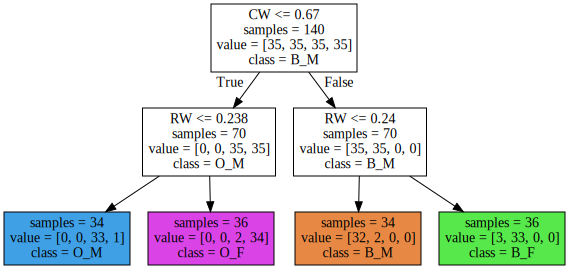

In [48]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

As shown above this algorithm on normalized data at maximum depth value of 2 performed better. Only CW and RW features are important in this model.

In [49]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.         0.6111817  0.         0.3888183  0.       ]


# # Random Forest

It is a collection of decision trees, where each tree is slightly different from the others. The idea behind this tree is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, is an advantage of this algorithm over decision tree.

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0,max_features=3)
#setting a maximum feature instead of all features to 3
rf.fit(X_train_NS, y_train)
print("Accuracy on training set using normalized data with \
a default maximum depth = {:.2f}%".format(rf.score(X_train_NS, y_train)*100))
print("Accuracy on test set using normalized data with \
a default maximum depth = {:.2f}%".format(rf.score(X_test_NS, y_test)*100))

Accuracy on training set using normalized data with a default maximum depth = 100.00%
Accuracy on test set using normalized data with a default maximum depth = 90.00%


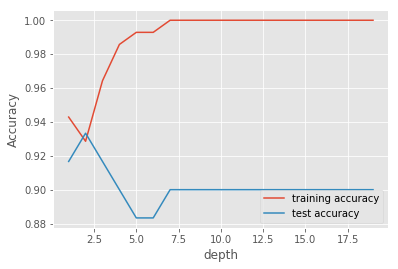

In [51]:
training_accuracy = []
test_accuracy = []
depth= range(1, 20)
for max_depth in depth:
    rf = RandomForestClassifier(n_estimators=100, max_features =3, max_depth=max_depth,random_state=0)
    rf.fit(X_train_NS, y_train)
    training_accuracy.append(rf.score(X_train_NS, y_train))
    test_accuracy.append(rf.score(X_test_NS, y_test))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("depth")
plt.legend()
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0,max_features=3,max_depth=2)
#setting a maximum feature instead of all features to 3
rf.fit(X_train_NS, y_train)
print("Accuracy on training set using normalized data with \
a default maximum depth of 2 = {:.2f}%".format(rf.score(X_train_NS, y_train)*100))
print("Accuracy on test set using normalized data with \
a maximum depth of 2 = {:.2f}%".format(rf.score(X_test_NS, y_test)*100))

Accuracy on training set using normalized data with a default maximum depth of 2 = 92.86%
Accuracy on test set using normalized data with a maximum depth of 2 = 93.33%


In [53]:
from sklearn.tree import export_graphviz
export_graphviz(rf.estimators_[99], out_file="RFtree.dot", class_names=["B_M", "B_F","O_M", "O_F"],
feature_names= ["FL","RW","CL","CW","BD"], impurity=False, filled=True)
#visualization only for the last tree 100th tree.

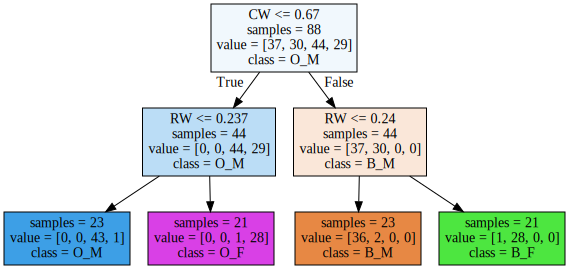

In [54]:
with open("RFtree.dot") as Rf:
    dot_graph = Rf.read()
graphviz.Source(dot_graph)

It performed the same like decision tree on test set but this algorithm improved overfitting.

## Deep learning Multi-Layer Perceptron (MLP)

Multilayer perceptrons for classification and regression problem can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLP) is a generalizations of linear models that perform multiple stages of processing to come to a decision.

In [55]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train, y_train)
print("Accuracy on training set using original data = {:.2f}%".format
      (mlp.score(X_train, y_train)*100))
print("Accuracy on test set using original data = {:.2f}%".format(mlp.score(X_test, y_test)*100))

Accuracy on training set using original data = 25.71%
Accuracy on test set using original data = 25.00%


The worst performance so far on this data set with the default value. Performance was improved as shown below

In [56]:
mlpS = MLPClassifier(random_state=0,max_iter=1000)
mlpS.fit(X_train_scaled, y_train)
print("Accuracy on training set after standardized the data = {:.2f}%".format(
    mlpS.score(X_train_scaled, y_train)*100))
print("Accuracy on test set after standardized the data = {:.2f}%".format(
    mlpS.score(X_test_scaled, y_test)*100))

Accuracy on training set after standardized the data = 97.86%
Accuracy on test set after standardized the data = 98.33%


Finally this algorithm performed best in this data set followed by SVC using polynomial kernel. The performance of other supervised algorithms like Gaussian naive bayes, LDA and multinomial naive bayes were compared. But their performances were less than the one found using MLP.